# Flight Delay Dataset Cleaning and Analysis
This notebook focuses on cleaning and analyzing the flight delay dataset. The steps include handling missing values, creating new features, and preparing the data for further analysis.

## Step 1: Import Required Libraries
We start by importing the necessary libraries for data manipulation and analysis.

In [173]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the Dataset
The flight delay dataset is loaded into a pandas DataFrame for analysis.

In [174]:
df= pd.read_csv('data/flights.csv',low_memory='TRUE')
airlines_df = pd.read_csv('data/airlines.csv',low_memory='TRUE')
airports_df = pd.read_csv('data/airports.csv',low_memory='TRUE')

## Step 3: Initial Exploration
We explore the dataset to understand its structure, size, and basic statistics.

##### Explore flights dataset

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [176]:
df.CANCELLED.value_counts()

CANCELLED
0    5729195
1      89884
Name: count, dtype: int64

In [177]:
df.shape

(5819079, 31)

In [178]:
# check statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5819079.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5819079.0,6.524085,3.405137,1.0,4.0,7.0,9.0,12.0
DAY,5819079.0,15.704594,8.783425,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5819079.0,3.926941,1.988845,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5819079.0,2173.092742,1757.063999,1.0,730.0,1690.0,3230.0,9855.0
SCHEDULED_DEPARTURE,5819079.0,1329.602470,483.751821,1.0,917.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5732926.0,1335.204439,496.423260,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5732926.0,9.370158,37.080942,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5730032.0,16.071662,8.895574,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5730032.0,1357.170841,498.009356,1.0,935.0,1343.0,1754.0,2400.0


In [179]:
df.describe(include='object').T

,count,unique,top,freq
AIRLINE,5819079,14,WN,1261855
TAIL_NUMBER,5804358,4897,N480HA,3768
ORIGIN_AIRPORT,5819079,930,ATL,346836
DESTINATION_AIRPORT,5819079,930,ATL,346904
CANCELLATION_REASON,89884,4,B,48851


In [180]:
#check for null values
df.isnull().sum().sort_values(ascending=False)

CANCELLATION_REASON    5729195
WEATHER_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
AIRLINE_DELAY          4755640
SECURITY_DELAY         4755640
AIR_SYSTEM_DELAY       4755640
AIR_TIME                105071
ARRIVAL_DELAY           105071
ELAPSED_TIME            105071
WHEELS_ON                92513
TAXI_IN                  92513
ARRIVAL_TIME             92513
TAXI_OUT                 89047
WHEELS_OFF               89047
DEPARTURE_DELAY          86153
DEPARTURE_TIME           86153
TAIL_NUMBER              14721
SCHEDULED_TIME               6
SCHEDULED_DEPARTURE          0
CANCELLED                    0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
SCHEDULED_ARRIVAL            0
DIVERTED                     0
ORIGIN_AIRPORT               0
DISTANCE                     0
DESTINATION_AIRPORT          0
MONTH                        0
YEAR                         0
dtype: int64

# Handling Missing Values and Delay/Cancellation Categorization in Flight Dataset

## Missing Values
Upon examining the dataset, we identified missing values across several columns.

## Delay Categories
Delay columns are divided into five categories:
- WEATHER_DELAY
- LATE_AIRCRAFT_DELAY
- AIRLINE_DELAY
- SECURITY_DELAY
- AIR_SYSTEM_DELAY

Each of these has 4,755,640 missing entries.

## Arrival Delay Interpretation
- If `ARRIVAL_DELAY > 0` → the flight is considered delayed.
- If `ARRIVAL_DELAY ≤ 0` → the flight is considered on time or early.

Delay time can be distributed into one or more of the five delay categories.

## Cancellation Logic
- If `CANCELLED = 1` → the flight is cancelled.
- If `CANCELLED = 0` → the flight is not cancelled.

For cancelled flights, the `CANCELLATION_REASON` column contains one of the following codes:
- **A**: Carrier
- **B**: Weather
- **C**: National Airspace System
- **D**: Security

If a flight is not cancelled, any missing value in `CANCELLATION_REASON` will be filled with `0` to indicate no cancellation.


## Handling Missing Values
We identify and handle missing values in the dataset. This includes filling missing values in delay columns, arrival delays, and other relevant features.

In [181]:
# Fill missing values in delay columns with 0 (no delay) using vectorized operations 0 (no delay) using vectorized operations delay columns with 0 (no delay) using vectorized operations
def fill_delay_columns(df, delay_columns):
    """    """
def fill_delay_columns(df, delay_columns):
    """
    Fill missing values in delay columns based on ARRIVAL_DELAY condition.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    delay_columns (list): List of delay columns to process.
    
    Returns:
    pd.DataFrame: Updated dataframe with filled delay columns.
    """
    for col in delay_columns:
        df[col] = df.apply(lambda row: row[col] if row['ARRIVAL_DELAY'] > 0 else 0, axis=1)
    return df

### Dealing with missing values for delay reasons 

In [182]:
# Apply the function
delay_columns = ['WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'AIR_SYSTEM_DELAY']
df = fill_delay_columns(df, delay_columns)

In [183]:
pd.set_option('display.max_columns', None)
# Check the updated dataframe
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0


### Creating a New Feature: `Other_Delay`
A new feature `Other_Delay` is created to capture delay values not covered by the five main delay categories.

### introduction new column for delay I don't know its reason 


In [184]:
#by checking the missing value I will assume a new feature for delay called Other_Delay only take the value of theses values and put it on it and fill missing value for other 5 column with 0
# Create a new feature 'Other_Delay' to capture missing delay values
df['Other_Delay'] = df.apply(
    lambda row: row['ARRIVAL_DELAY'] + row['DEPARTURE_DELAY'] if pd.isnull(row['WEATHER_DELAY']) and pd.isnull(row['LATE_AIRCRAFT_DELAY']) and 
    pd.isnull(row['AIRLINE_DELAY']) and pd.isnull(row['SECURITY_DELAY']) and pd.isnull(row['AIR_SYSTEM_DELAY']) else 0, axis=1
)

# Fill missing values in the original delay columns with 0
for col in delay_columns:
    df[col] = df[col].fillna(0)

In [185]:
pd.set_option('display.max_columns', None)
# Check the updated dataframe
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Other_Delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,3.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
# # Fill missing ARRIVAL_DELAY with 0 for cancelled or diverted flights
# df['ARRIVAL_DELAY'] = df.apply(
#     lambda row: 0 if pd.isnull(row['ARRIVAL_DELAY']) and (row['CANCELLED'] == 1) else row['ARRIVAL_DELAY'],
#     axis=1
# )
# # Fill missing DEPARTURE_DELAY with 0 for cancelled or diverted flights
# df['DEPARTURE_DELAY'] = df.apply(
#     lambda row: 0 if pd.isnull(row['DEPARTURE_DELAY']) and (row['CANCELLED'] == 1 or row['DIVERTED'] == 1) else row['DEPARTURE_DELAY'],
#     axis=1
# )

### Filling Missing Values in Time Columns
Missing values in columns such as `AIR_TIME`, `ELAPSED_TIME`, `WHEELS_OFF`, and `TAXI_OUT` are filled with zero.

In [187]:
#fill missing values with 0
df['WHEELS_OFF'] = df['WHEELS_OFF'].fillna(0)
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].fillna(0)
df['TAXI_IN'] = df['TAXI_IN'].fillna(0)
df['TAXI_OUT'] = df['TAXI_OUT'].fillna(0)
df['WHEELS_ON'] = df['WHEELS_ON'].fillna(0)
df['AIR_TIME'] = df['AIR_TIME'].fillna(0)
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].fillna(0)
# df.dropna(subset=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'], inplace=True)


### Handling `CANCELLATION_REASON`
Missing values in `CANCELLATION_REASON` are filled with `0` for flights that are not cancelled.

In [188]:
#fill missing values for canncellation reasion with 0 if it not cancelled 
df['CANCELLATION_REASON'] = df.apply(
    lambda row: 0 if pd.isnull(row['CANCELLATION_REASON']) and (row['CANCELLED'] == 0) else row['CANCELLATION_REASON'],
    axis=1
)

In [ ]:
# #fill missing values for canncellation reasion with 0 if it not cancelled 
# df['CANCELLATION_REASON'] = df.apply(
#     lambda row: 'not cancelled'  if pd.isnull(row['CANCELLATION_REASON']) and (row['CANCELLED'] == 1) else row['CANCELLATION_REASON'],
#     axis=1
# )

In [189]:
pd.set_option('display.max_columns', None)

#fill missing values in ARRIVAL_TIME with no flight if it cancelled or diverted
df['ARRIVAL_TIME'] = df.apply(
    lambda row: "no flight" if pd.isnull(row['ARRIVAL_TIME']) and (row['CANCELLED'] == 1 or row['DIVERTED'] == 1) else row['ARRIVAL_TIME'],
    axis=1
)

In [190]:
df.CANCELLED.value_counts()

CANCELLED
0    5729195
1      89884
Name: count, dtype: int64

In [191]:
#fill nan values in TAIL_NUMBER with cancelled  if it cancelled
df['TAIL_NUMBER'] = df.apply(
    lambda row: 'flight cancelled' if pd.isnull(row['TAIL_NUMBER']) and (row['CANCELLED'] == 1) else row['TAIL_NUMBER'],
    axis=1
)

In [192]:
#fill missing value in scheduale time with df['SCHEDULED_DEPARTURE']-df['SCHEDULED_ARRIVAL']
df['SCHEDULED_TIME'] = df.apply(
    lambda row: row['SCHEDULED_DEPARTURE'] - row['SCHEDULED_ARRIVAL'] if pd.isnull(row['SCHEDULED_TIME']) else row['SCHEDULED_TIME'],
    axis=1
)

In [193]:
df.isnull().sum().sort_values(ascending=False)

ARRIVAL_DELAY          105071
DEPARTURE_DELAY         86153
YEAR                        0
DISTANCE                    0
WEATHER_DELAY               0
LATE_AIRCRAFT_DELAY         0
AIRLINE_DELAY               0
SECURITY_DELAY              0
AIR_SYSTEM_DELAY            0
CANCELLATION_REASON         0
CANCELLED                   0
DIVERTED                    0
ARRIVAL_TIME                0
SCHEDULED_ARRIVAL           0
TAXI_IN                     0
WHEELS_ON                   0
AIR_TIME                    0
MONTH                       0
ELAPSED_TIME                0
SCHEDULED_TIME              0
WHEELS_OFF                  0
TAXI_OUT                    0
DEPARTURE_TIME              0
SCHEDULED_DEPARTURE         0
DESTINATION_AIRPORT         0
ORIGIN_AIRPORT              0
TAIL_NUMBER                 0
FLIGHT_NUMBER               0
AIRLINE                     0
DAY_OF_WEEK                 0
DAY                         0
Other_Delay                 0
dtype: int64

### Explore Airlines Dataset

In [194]:
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [195]:
airlines_df.shape

(14, 2)

In [196]:
airlines_df.describe()


,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [197]:
airlines_df.describe(include='object').T


,count,unique,top,freq
IATA_CODE,14,14,UA,1
AIRLINE,14,14,United Air Lines Inc.,1


In [198]:
#check for null values
airlines_df.isnull().sum().sort_values(ascending=False)

IATA_CODE    0
AIRLINE      0
dtype: int64

### Explore Airlines Dataset

In [199]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [200]:
airports_df.shape

(322, 7)

In [201]:
airports_df.describe()


,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [202]:
airports_df.describe(include='object').T


,count,unique,top,freq
IATA_CODE,322,322,ABE,1
AIRPORT,322,322,Lehigh Valley International Airport,1
CITY,322,308,Jackson,2
STATE,322,54,TX,24
COUNTRY,322,1,USA,322


In [203]:
#check for null values
airports_df.isnull().sum().sort_values(ascending=False)

LATITUDE     3
LONGITUDE    3
IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
dtype: int64

### fill missing values in airports_df 

In [204]:
def fill_missing_coordinates(df):
    # Dictionary with known coordinates
    coordinates = {
        'ECP': {'LATITUDE': 30.35825, 'LONGITUDE': -85.79561},
        'PBG': {'LATITUDE': 44.65094, 'LONGITUDE': -73.46814},
        'UST': {'LATITUDE': 29.95861, 'LONGITUDE': -81.33889}
    }

    # Apply coordinate filling
    for iata, coords in coordinates.items():
        mask = df['IATA_CODE'] == iata
        df.loc[mask, 'LATITUDE'] = coords['LATITUDE']
        df.loc[mask, 'LONGITUDE'] = coords['LONGITUDE']

    return df


In [205]:
fill_missing_coordinates(airports_df)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [206]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [207]:
# check for null values
airports_df.isnull().sum().sort_values(ascending=False)

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

## Step 5: Export Cleaned Data
The cleaned datasets are exported for further analysis or modeling.

In [208]:
#exporting the cleaned data
# df.to_csv('data/cleaned_flights.csv', index=False)
# airports_df.to_csv('data/cleaned_airports.csv', index=False)
# airlines_df.to_csv('data/cleaned_airlines.csv', index=False)

## Step 6: Exploratory Data Analysis (EDA)
In this section, we will perform EDA to gain insights into the dataset.

In [209]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Other_Delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [211]:
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


#### univarite analysis

In [212]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Other_Delay'],
      dtype='object')

In [213]:
airports_df.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [214]:
airlines_df.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

In [215]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5819079.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5819079.0,6.524085,3.405137,1.0,4.0,7.0,9.0,12.0
DAY,5819079.0,15.704594,8.783425,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5819079.0,3.926941,1.988845,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5819079.0,2173.092742,1757.063999,1.0,730.0,1690.0,3230.0,9855.0
SCHEDULED_DEPARTURE,5819079.0,1329.602470,483.751821,1.0,917.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5819079.0,1315.436385,518.450696,0.0,908.0,1323.0,1736.0,2400.0
DEPARTURE_DELAY,5732926.0,9.370158,37.080942,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5819079.0,15.825724,9.045025,0.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5819079.0,1336.402608,521.510113,0.0,924.0,1335.0,1750.0,2400.0


In [216]:
#Flight Delays Across Airlines
#flights count by airline
flights_count = df['AIRLINE'].value_counts().reset_index()
flights_count.columns = ['AIRLINE', 'FLIGHT_COUNT']
flights_count

,AIRLINE,FLIGHT_COUNT
0,WN,1261855
1,DL,875881
2,AA,725984
3,OO,588353
4,EV,571977
5,UA,515723
6,MQ,294632
7,B6,267048
8,US,198715
9,AS,172521


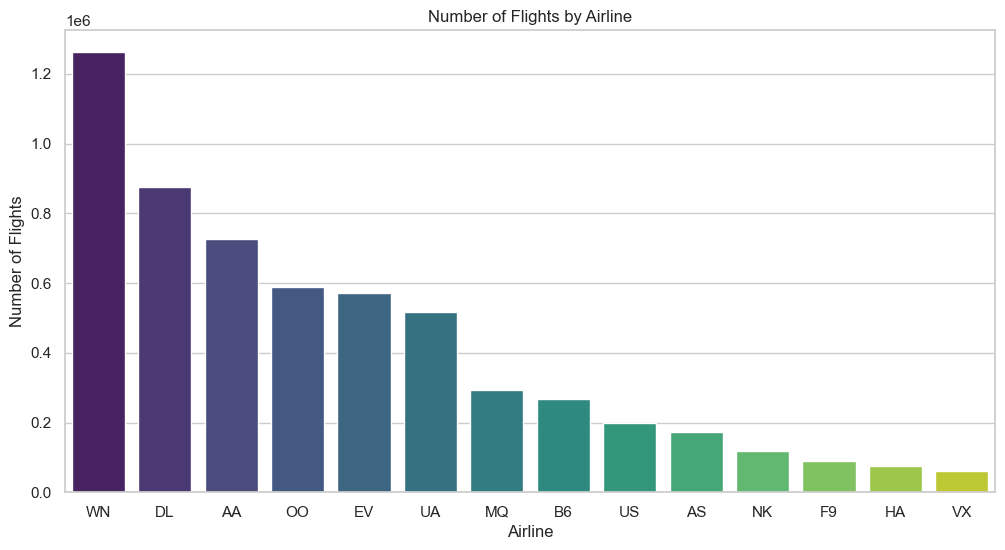

In [217]:
# Plotting the number of flights by airline
plt.figure(figsize=(12, 6))
sns.barplot(x='AIRLINE', y='FLIGHT_COUNT', data=flights_count, palette='viridis')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

In [218]:
# Define flight status based on conditions
def determine_status(row):
    if row['CANCELLED'] == 1:
        return 'Canceled'
    elif row['DIVERTED'] == 1:
        return 'Diverted'
    elif row['ARRIVAL_DELAY'] > 0:
        return 'Delayed'
    elif row['ARRIVAL_DELAY'] < 0:
        return 'Early'
    elif row['ARRIVAL_DELAY'] == 0:
        return 'On-Time'
# Apply the function to create a new column
df['FLIGHT_STATUS'] = df.apply(determine_status, axis=1)

In [219]:
df.CANCELLED.value_counts()

CANCELLED
0    5729195
1      89884
Name: count, dtype: int64

In [220]:
df.DIVERTED.value_counts()

DIVERTED
0    5803892
1      15187
Name: count, dtype: int64

In [221]:
stats_count=df['FLIGHT_STATUS'].value_counts()

In [222]:
stats_count

FLIGHT_STATUS
Early       3500899
Delayed     2086896
On-Time      126213
Canceled      89884
Diverted      15187
Name: count, dtype: int64

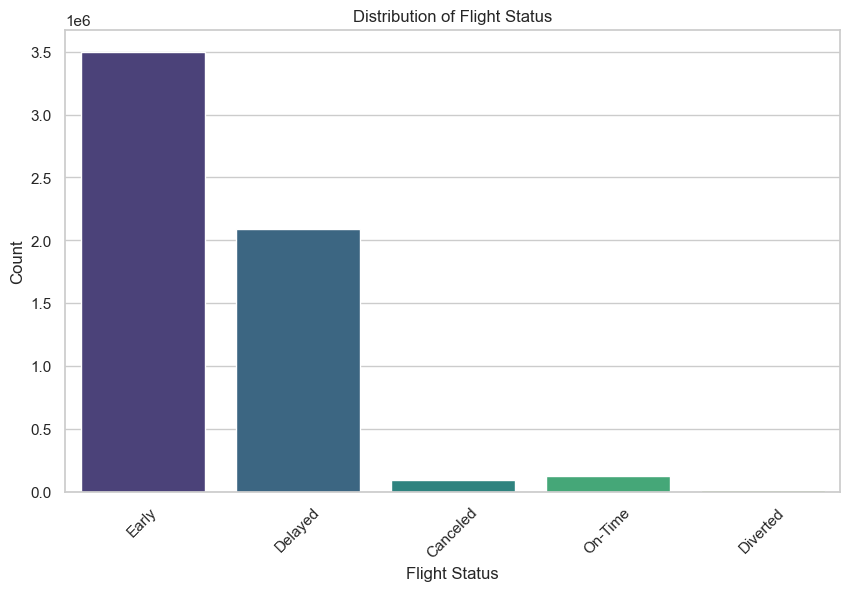

In [223]:
# Plotting the distribution of flight status
plt.figure(figsize=(10, 6))
sns.countplot(x='FLIGHT_STATUS', data=df, palette='viridis')
plt.title('Distribution of Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

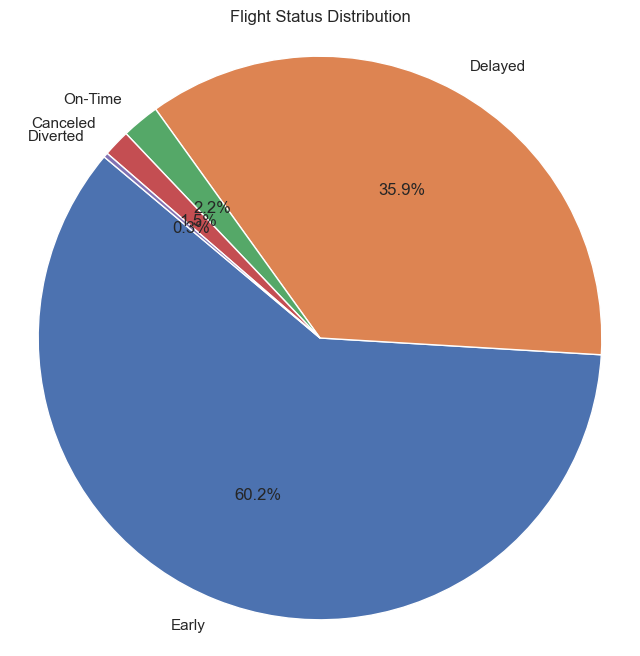

In [224]:
# pie chart for flight status
plt.figure(figsize=(8, 8))
plt.pie(stats_count, labels=stats_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Flight Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [225]:
# Average Departure and Arrival Delay Over Time & Cancellation Rate
# Group by month and calculate average delays
average_delays = df.groupby('MONTH')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()
average_delays = average_delays.reset_index()


In [226]:
average_delays

,MONTH,DEPARTURE_DELAY,ARRIVAL_DELAY
0,1,9.759471,5.813583
1,2,11.885284,8.320500
2,3,9.660903,4.920673
3,4,7.721885,3.163190
4,5,9.454144,4.485019
5,6,13.986016,9.601590
6,7,11.394664,6.431775
7,8,9.932045,4.607372
8,9,4.823560,-0.772571
9,10,4.982661,-0.780390


In [227]:
# coverting month number to month name
average_delays['MONTH'] = average_delays['MONTH'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

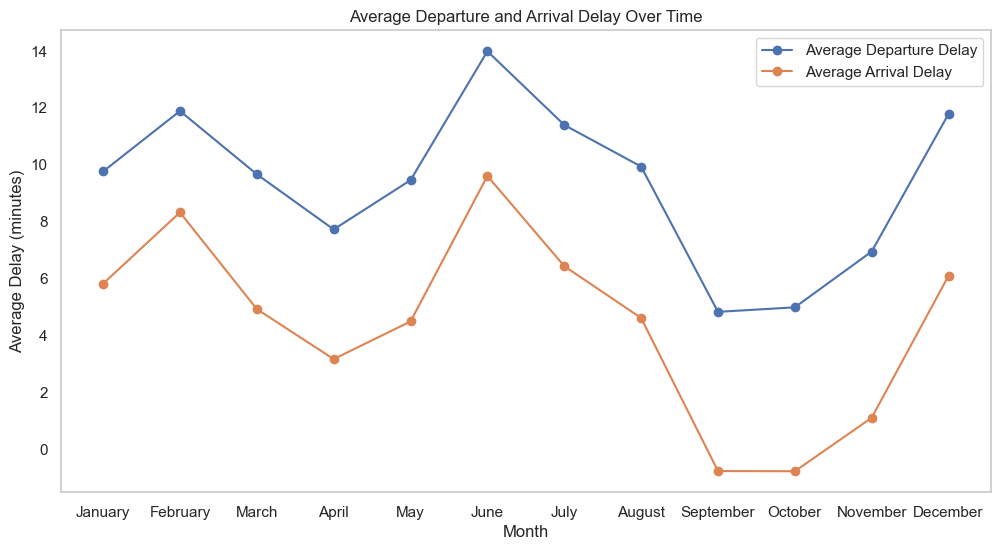

In [228]:
# Plotting area chart for average delays
plt.figure(figsize=(12, 6))
plt.plot(average_delays['MONTH'], average_delays['DEPARTURE_DELAY'], label='Average Departure Delay', marker='o')
plt.plot(average_delays['MONTH'], average_delays['ARRIVAL_DELAY'], label='Average Arrival Delay', marker='o')
plt.title('Average Departure and Arrival Delay Over Time')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(average_delays['MONTH'])
plt.legend()
plt.grid()
plt.show()

In [229]:
# Cancellation Rate by Month
cancellation_rate = df.groupby('MONTH')['CANCELLED'].mean() * 100
cancellation_rate = cancellation_rate.reset_index()
cancellation_rate['MONTH'] = cancellation_rate['MONTH'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
cancellation_rate

,MONTH,CANCELLED
0,January,2.549535
1,February,4.780389
2,March,2.181586
3,April,0.931669
4,May,1.145690
5,June,1.809894
6,July,0.922956
7,August,0.989548
8,September,0.446288
9,October,0.504767


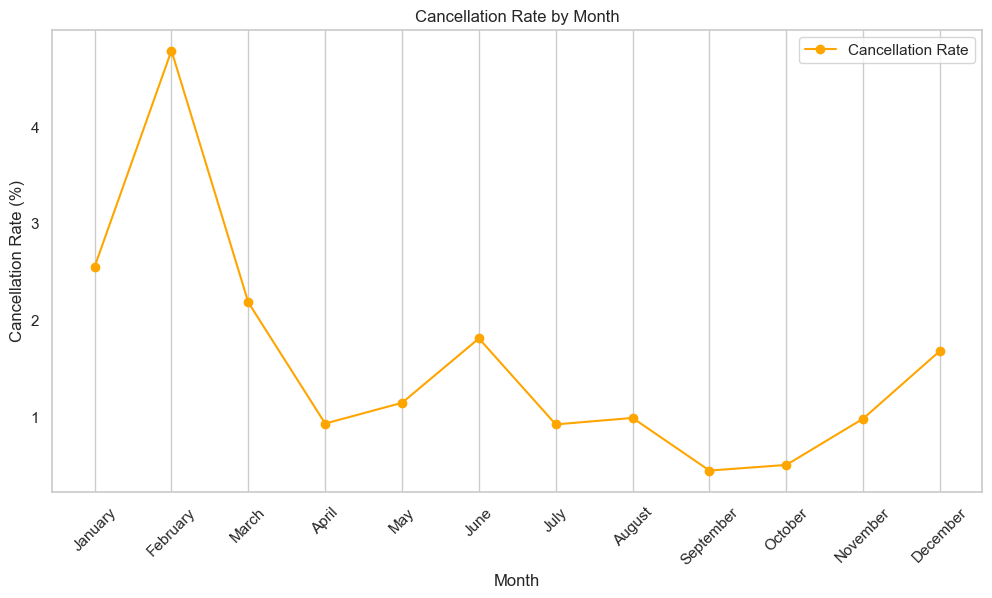

In [230]:
# Plotting the Cancellation Rate as a Line Chart
plt.figure(figsize=(12, 6))
plt.plot(cancellation_rate['MONTH'], cancellation_rate['CANCELLED'], marker='o', color='orange', label='Cancellation Rate')
plt.title('Cancellation Rate by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()

In [231]:
#Delay Across Different Airlines
# Group by airline and calculate average delays
average_delay_airline = df.groupby('AIRLINE')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()
average_delay_airline = average_delay_airline.reset_index()

In [232]:
average_delay_airline

,AIRLINE,DEPARTURE_DELAY,ARRIVAL_DELAY
0,AA,8.900856,3.451372
1,AS,1.785801,-0.976563
2,B6,11.514353,6.677861
3,DL,7.369254,0.186754
4,EV,8.715934,6.585379
5,F9,13.350858,12.504706
6,HA,0.485713,2.023093
7,MQ,10.125188,6.457873
8,NK,15.944766,14.471800
9,OO,7.801104,5.845652


<Figure size 1000x1000 with 0 Axes>

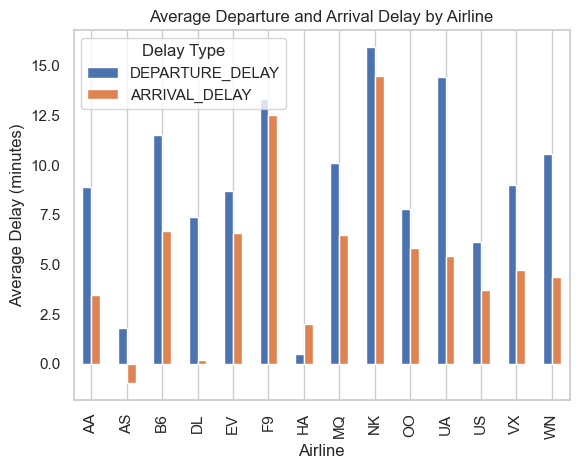

In [233]:
# Plotting bar chart for average delay departure and arrival by airline
plt.figure(figsize=(10, 10))  # Adjust the figure size
average_delay_airline.plot(kind='bar', x='AIRLINE', stacked=False)
plt.title('Average Departure and Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.legend(title='Delay Type')
plt.grid(axis='y')
plt.show()

In [234]:
#Highest Average Departure and Arrival Delays by Top 20 Airports
# Group by origin airport and calculate average delays
average_delay_origin = df.groupby('ORIGIN_AIRPORT')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()
average_delay_origin = average_delay_origin.reset_index()
# average_delay_origin = average_delay_origin.sort_values(by='ARRIVAL_DELAY', ascending=False).head(20)
average_delay_origin.head(20)

,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY
0,10135,10.075221,7.601770
1,10136,3.368132,-6.513812
2,10140,5.682484,0.320799
3,10141,1.803030,0.606061
4,10146,9.500000,11.987654
5,10154,22.857143,25.535714
6,10155,-4.147059,-12.725926
7,10157,12.427273,9.500000
8,10158,0.017316,-4.882096
9,10165,17.555556,19.555556


In [235]:
#Merging with airports_df to get airport names
merged_df = pd.merge(average_delay_origin, airports_df[['IATA_CODE', 'AIRPORT']], left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')
merged_df = merged_df.drop(columns=['IATA_CODE'])
merged_df = merged_df.rename(columns={'AIRPORT': 'ORIGIN_AIRPORT_NAME'})
merged_df.dropna(subset=['ORIGIN_AIRPORT_NAME'], inplace=True)
merged_df=merged_df.head(20)
#sort values by sum of arrival and departure delay
merged_df['TOTAL_DELAY'] = merged_df['DEPARTURE_DELAY'] + merged_df['ARRIVAL_DELAY']
merged_df = merged_df.sort_values(by='TOTAL_DELAY', ascending=False)
merged_df


,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT_NAME,TOTAL_DELAY
627,ASE,17.587538,15.492492,Aspen-Pitkin County Airport,33.080030
613,ACK,16.388889,9.470103,Nantucket Memorial Airport,25.858992
617,ADK,10.662921,11.034091,Adak Airport,21.697012
611,ABR,10.101056,9.909502,Aberdeen Regional Airport,20.010558
615,ACV,12.017323,7.841483,Arcata Airport,19.858805
616,ACY,9.946489,8.734902,Atlantic City International Airport,18.681391
619,AEX,9.122142,8.943353,Alexandria International Airport,18.065495
620,AGS,8.491475,8.452452,Augusta Regional Airport (Bush Field),16.943927
612,ABY,8.880046,7.587760,Southwest Georgia Regional Airport,16.467806
608,ABE,8.844812,6.249663,Lehigh Valley International Airport,15.094475


<Figure size 1000x1000 with 0 Axes>

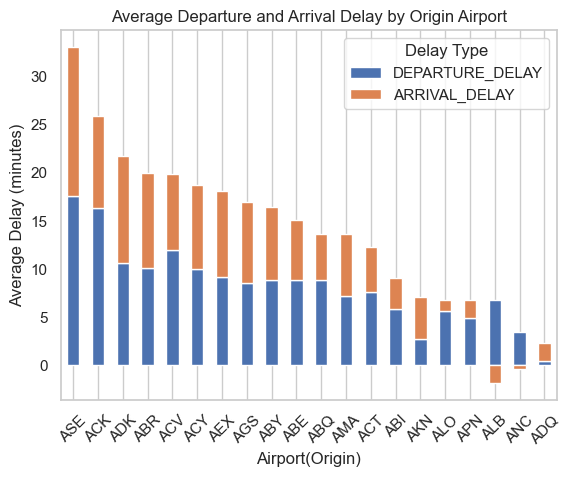

In [236]:
#Highest Average Departure and Arrival Delays by Top 20 Airports
# Plotting bar chart for average delay departure and arrival by airport
plt.figure(figsize=(10, 10))  # Adjust the figure size
merged_df.plot(kind='bar', x='ORIGIN_AIRPORT',y=['DEPARTURE_DELAY','ARRIVAL_DELAY'], stacked=True)
plt.title('Average Departure and Arrival Delay by Origin Airport')
plt.xlabel('Airport(Origin)')
plt.ylabel('Average Delay (minutes)')
plt.legend(title='Delay Type')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [237]:
#Highest Average Departure and Arrival Delays by Top 20 Airports
# Group by origin airport and calculate average delays
average_delay_destination= df.groupby('DESTINATION_AIRPORT')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()
average_delay_destination = average_delay_destination.reset_index()
# average_delay_destination = average_delay_destination.sort_values(by='ARRIVAL_DELAY', ascending=False).head(100)
average_delay_destination

,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY
0,10135,4.424779,1.834821
1,10136,3.951087,-0.322404
2,10140,5.695958,1.339977
3,10141,4.402985,-1.626866
4,10146,8.439024,8.219512
...,...,...,...
925,WRG,5.732116,5.375767
926,WYS,-1.875000,4.193237
927,XNA,11.397254,8.772090
928,YAK,-1.134763,0.371166


In [238]:
merged_df = pd.merge(average_delay_destination, airports_df[['IATA_CODE', 'AIRPORT']], left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left')
merged_df = merged_df.drop(columns=['IATA_CODE'])
merged_df = merged_df.rename(columns={'AIRPORT': 'DEST_AIRPORT_NAME'})
merged_df.dropna(subset=['DEST_AIRPORT_NAME'], inplace=True)
merged_df=merged_df.head(20)
#sort values by sum of arrival and departure delay
merged_df['TOTAL_DELAY'] = merged_df['DEPARTURE_DELAY'] + merged_df['ARRIVAL_DELAY']
merged_df = merged_df.sort_values(by='TOTAL_DELAY', ascending=False)
merged_df


,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DEST_AIRPORT_NAME,TOTAL_DELAY
627,ASE,16.779326,15.829448,Aspen-Pitkin County Airport,32.608774
616,ACY,12.835644,11.825496,Atlantic City International Airport,24.661139
614,ACT,13.320804,10.637249,Waco Regional Airport,23.958052
615,ACV,11.468019,9.675612,Arcata Airport,21.143630
612,ABY,9.929804,8.681713,Southwest Georgia Regional Airport,18.611517
622,ALB,11.691471,6.576352,Albany International Airport,18.267823
623,ALO,12.018707,5.945299,Waterloo Regional Airport,17.964007
610,ABQ,10.355970,5.614678,Albuquerque International Sunport,15.970648
620,AGS,8.879523,6.368130,Augusta Regional Airport (Bush Field),15.247653
624,AMA,8.368100,6.667649,Rick Husband Amarillo International Airport,15.035749


<Figure size 1000x1000 with 0 Axes>

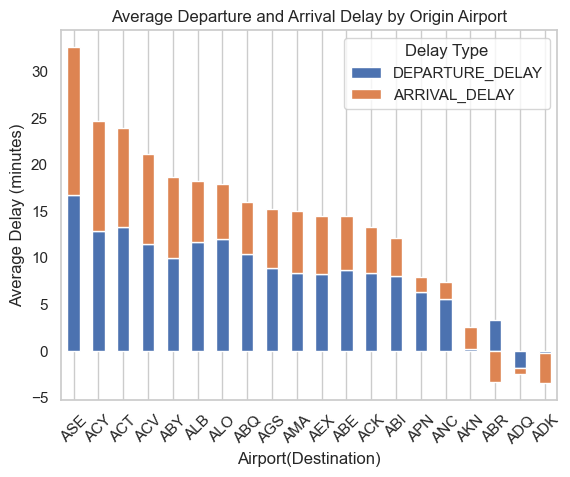

In [239]:
#Highest Average Departure and Arrival Delays by Top 20 Airports
# Plotting bar chart for average delay departure and arrival by airport
plt.figure(figsize=(10, 10))  # Adjust the figure size
merged_df.plot(kind='bar', x='DESTINATION_AIRPORT',y=['DEPARTURE_DELAY','ARRIVAL_DELAY'], stacked=True)
plt.title('Average Departure and Arrival Delay by Origin Airport')
plt.xlabel('Airport(Destination)')
plt.ylabel('Average Delay (minutes)')
plt.legend(title='Delay Type')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [240]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Other_Delay,FLIGHT_STATUS
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Early
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Early
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,Delayed
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Early
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Early
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Early
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Early
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Early


In [241]:
#calculate mean for each column in [AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY, Other_Delay]
df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Other_Delay']].mean()

AIR_SYSTEM_DELAY       2.463579
SECURITY_DELAY         0.013917
AIRLINE_DELAY          3.466692
LATE_AIRCRAFT_DELAY    4.289670
WEATHER_DELAY          0.532770
Other_Delay            1.929963
dtype: float64

### Mean of Delay Types
This plot shows the average delay for each type of delay category.

In [242]:
# Calculate the mean of each delay type
mean_values = df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Other_Delay']].mean()

In [243]:
mean_values

AIR_SYSTEM_DELAY       2.463579
SECURITY_DELAY         0.013917
AIRLINE_DELAY          3.466692
LATE_AIRCRAFT_DELAY    4.289670
WEATHER_DELAY          0.532770
Other_Delay            1.929963
dtype: float64

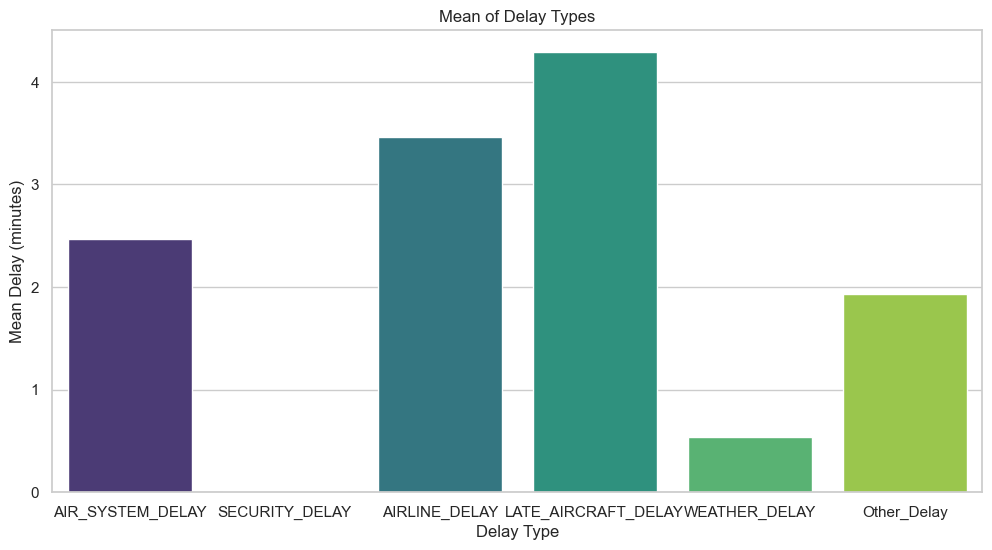

In [244]:
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_values.index, y=mean_values.values, palette='viridis')
plt.title('Mean of Delay Types')
plt.xlabel('Delay Type')
plt.ylabel('Mean Delay (minutes)')

plt.show()

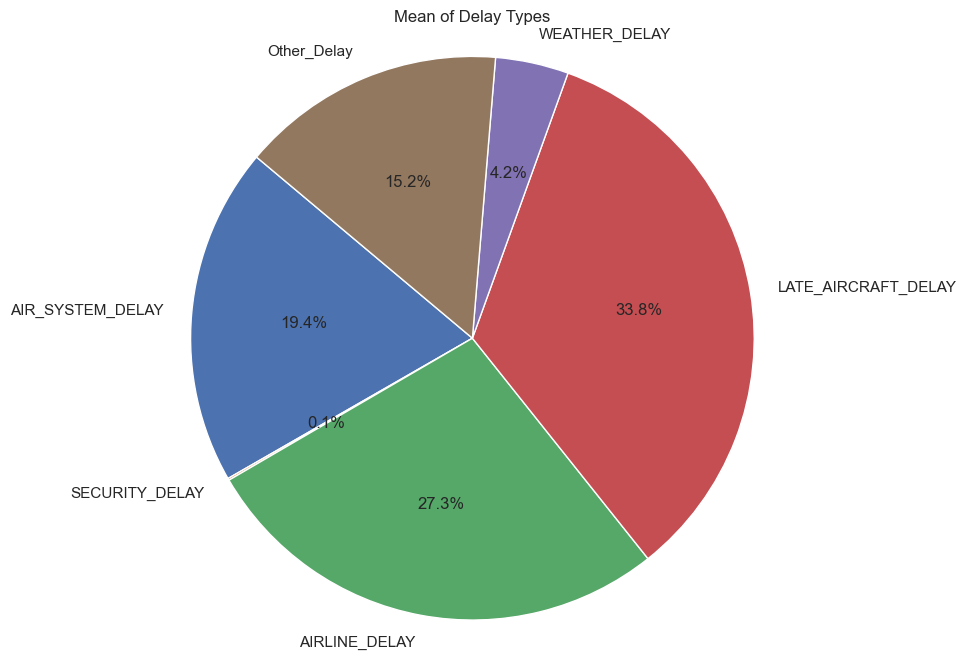

In [245]:
# Pie chart for mean of each delay type with custom colors
plt.figure(figsize=(8, 8))
plt.pie(mean_values, labels=mean_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Mean of Delay Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [246]:
# Filter out cancelled and diverted flights
non_cancelled_diverted_df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]

# Group by flight distance and calculate average delays
average_delay_distance = non_cancelled_diverted_df.groupby('DISTANCE')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()
average_delay_distance = average_delay_distance.reset_index()
average_delay_distance = average_delay_distance.sort_values(by='DISTANCE', ascending=True)
average_delay_distance

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
0,31,3.083099,4.825352
1,41,11.200000,16.373333
2,62,-4.000000,0.000000
3,67,9.720737,7.949794
4,68,4.011921,0.509272
...,...,...,...
1345,4243,20.449861,10.149025
1346,4502,10.987569,2.013812
1347,4817,18.332353,6.364706
1348,4962,14.712676,-0.900000


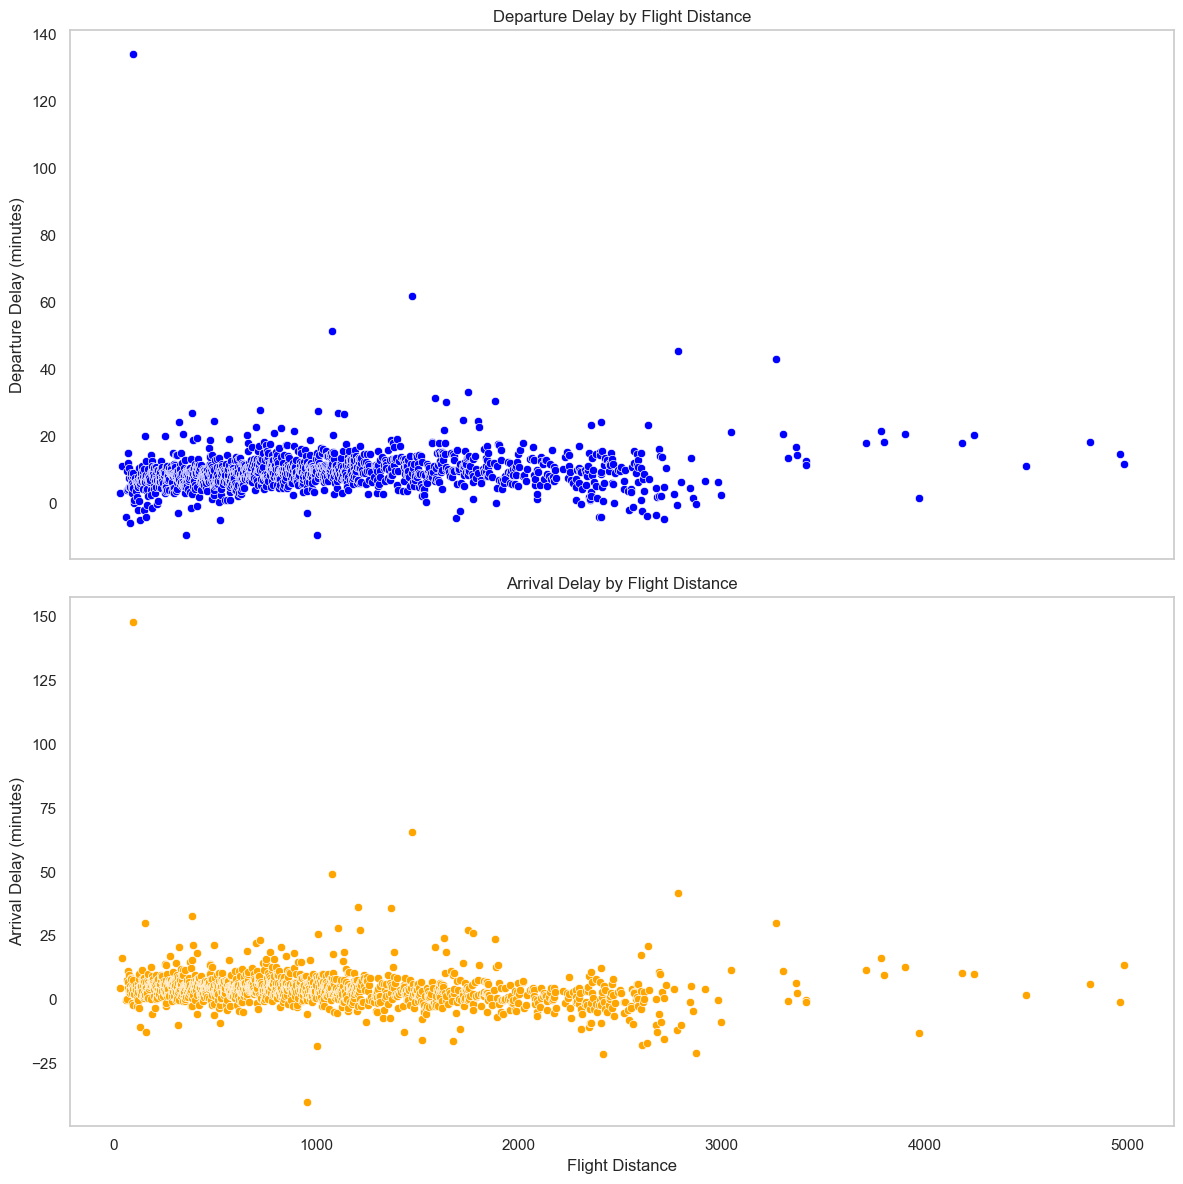

In [247]:
# Relation of flight distance with arrival and departure delay
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Scatter plot for Departure Delay
sns.scatterplot(ax=axes[0], x='DISTANCE', y='DEPARTURE_DELAY', data=average_delay_distance, color='blue')
axes[0].set_title('Departure Delay by Flight Distance')
axes[0].set_xlabel('Flight Distance')
axes[0].set_ylabel('Departure Delay (minutes)')
axes[0].grid()

# Scatter plot for Arrival Delay
sns.scatterplot(ax=axes[1], x='DISTANCE', y='ARRIVAL_DELAY', data=average_delay_distance, color='orange')
axes[1].set_title('Arrival Delay by Flight Distance')
axes[1].set_xlabel('Flight Distance')
axes[1].set_ylabel('Arrival Delay (minutes)')
axes[1].grid()

plt.tight_layout()
plt.show()

###### Short and Medium-distance (0–3,000 miles) were observed to have the highest percentage of delays, while long-haul flights tended to experience fewer delays.

In [248]:
#Diverted Flights by Airlines and Airports 
# Group by airline and calculate the number of diverted flights
diverted_flights = df[df['DIVERTED'] == 1].groupby('AIRLINE')['DIVERTED'].count().reset_index()
diverted_flights.columns = ['AIRLINE', 'DIVERTED_COUNT']
diverted_flights = diverted_flights.sort_values(by='DIVERTED_COUNT', ascending=False)
diverted_flights

,AIRLINE,DIVERTED_COUNT
13,WN,3409
0,AA,2130
4,EV,1994
3,DL,1782
9,OO,1579
10,UA,1388
7,MQ,816
2,B6,730
11,US,425
1,AS,413


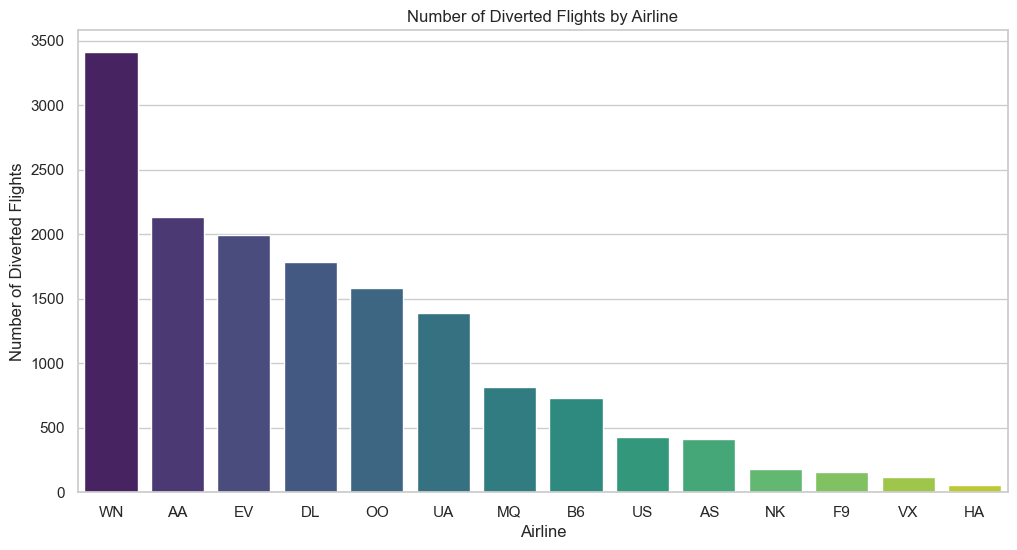

In [249]:
# Plotting the number of diverted flights by airline
plt.figure(figsize=(12, 6))
sns.barplot(x='AIRLINE', y='DIVERTED_COUNT', data=diverted_flights, palette='viridis')  
plt.title('Number of Diverted Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Diverted Flights')
plt.show()

In [250]:
# Diverted Flights by  Airports 
# Group by origin airport and calculate the number of diverted flights
diverted_flights_airport = df[df['DIVERTED'] == 1].groupby('ORIGIN_AIRPORT')['DIVERTED'].count().reset_index()
diverted_flights_airport.columns = ['ORIGIN_AIRPORT', 'DIVERTED_COUNT']
diverted_flights_airport = diverted_flights_airport.sort_values(by='DIVERTED_COUNT', ascending=False)
diverted_flights_airport = diverted_flights_airport.head(20)
diverted_flights_airport


,ORIGIN_AIRPORT,DIVERTED_COUNT
410,ORD,782
232,ATL,773
288,DFW,650
287,DEN,530
365,LAX,506
342,IAH,473
246,BOS,389
455,SFO,369
420,PHX,361
379,MCO,332


In [251]:
# Merge diverted_flights_airport with airports_df to get airport names
diverted_flights_airport = pd.merge(
    diverted_flights_airport, 
    airports_df[['IATA_CODE', 'AIRPORT']], 
    left_on='ORIGIN_AIRPORT', 
    right_on='IATA_CODE', 
    how='left'
)



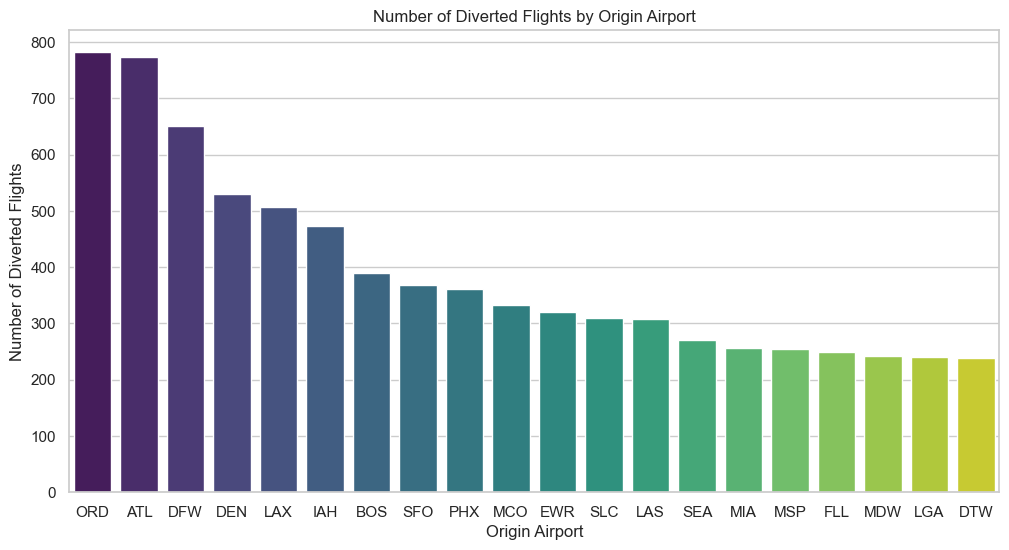

In [252]:
# Plot diverted flights by airport
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='ORIGIN_AIRPORT', y='DIVERTED_COUNT', data=diverted_flights_airport, palette='viridis')
plt.title('Number of Diverted Flights by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Diverted Flights')
plt.show()

### Correlation Heatmap of Numerical Features
This heatmap shows the correlation between numerical features in the dataset.

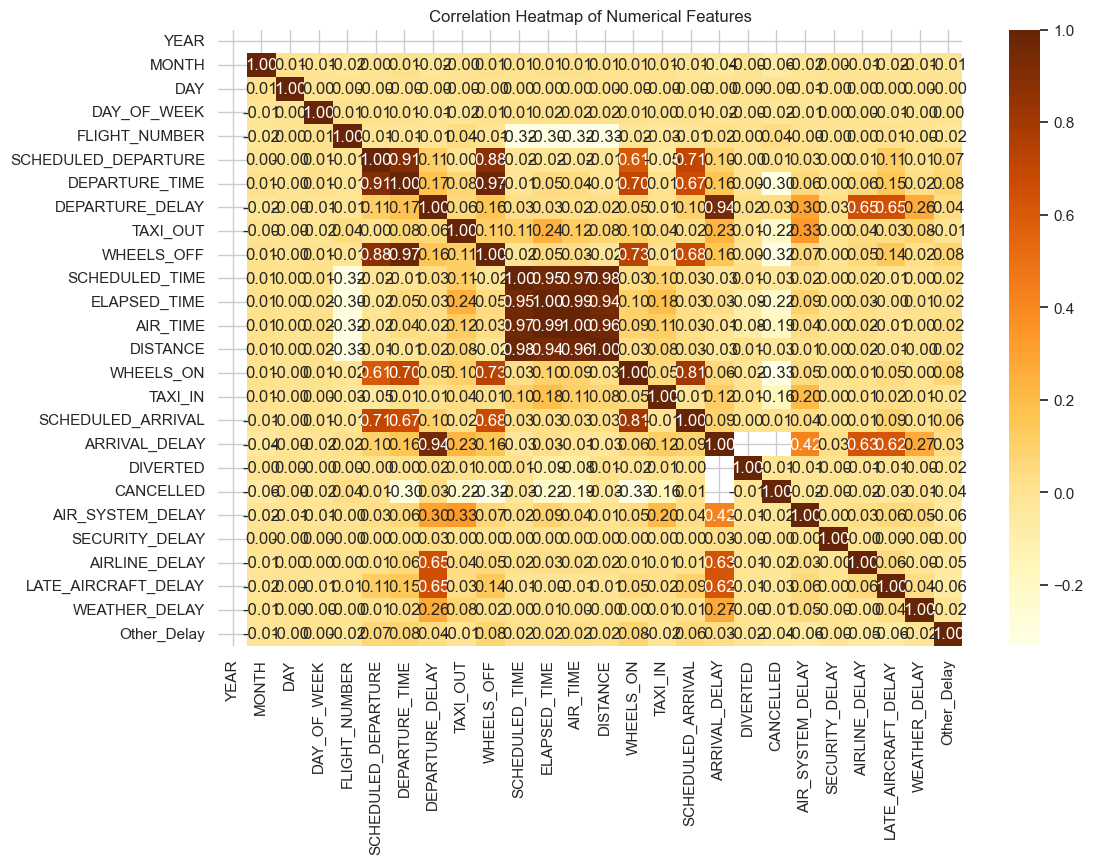

In [253]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='YlOrBr', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<Axes: >

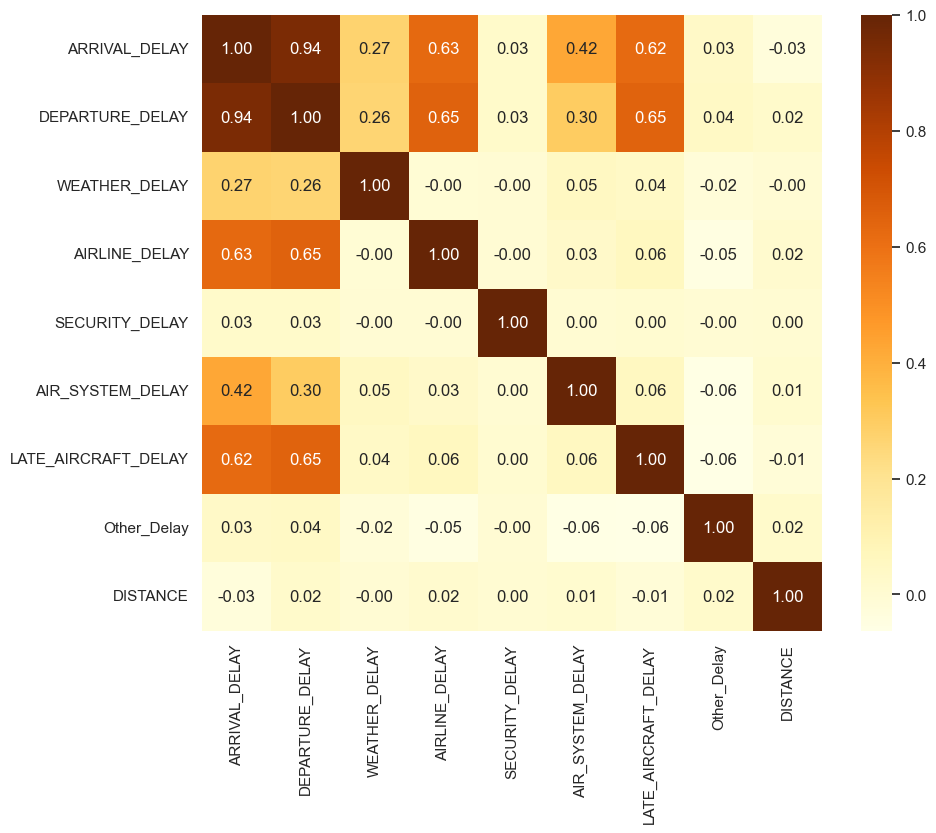

In [254]:
# I need to check the correlation between the delay columns arrival and departure delay and causes like weather delay, airline delay, security delay, air system delay, late aircraft delay and other delay and distance
# Calculate the correlation matrix for the delay columns    
delay_columns = ['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'AIR_SYSTEM_DELAY', 'LATE_AIRCRAFT_DELAY', 'Other_Delay', 'DISTANCE']
correlation_matrix = df[delay_columns].corr()
# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='YlOrBr', cbar=True)    

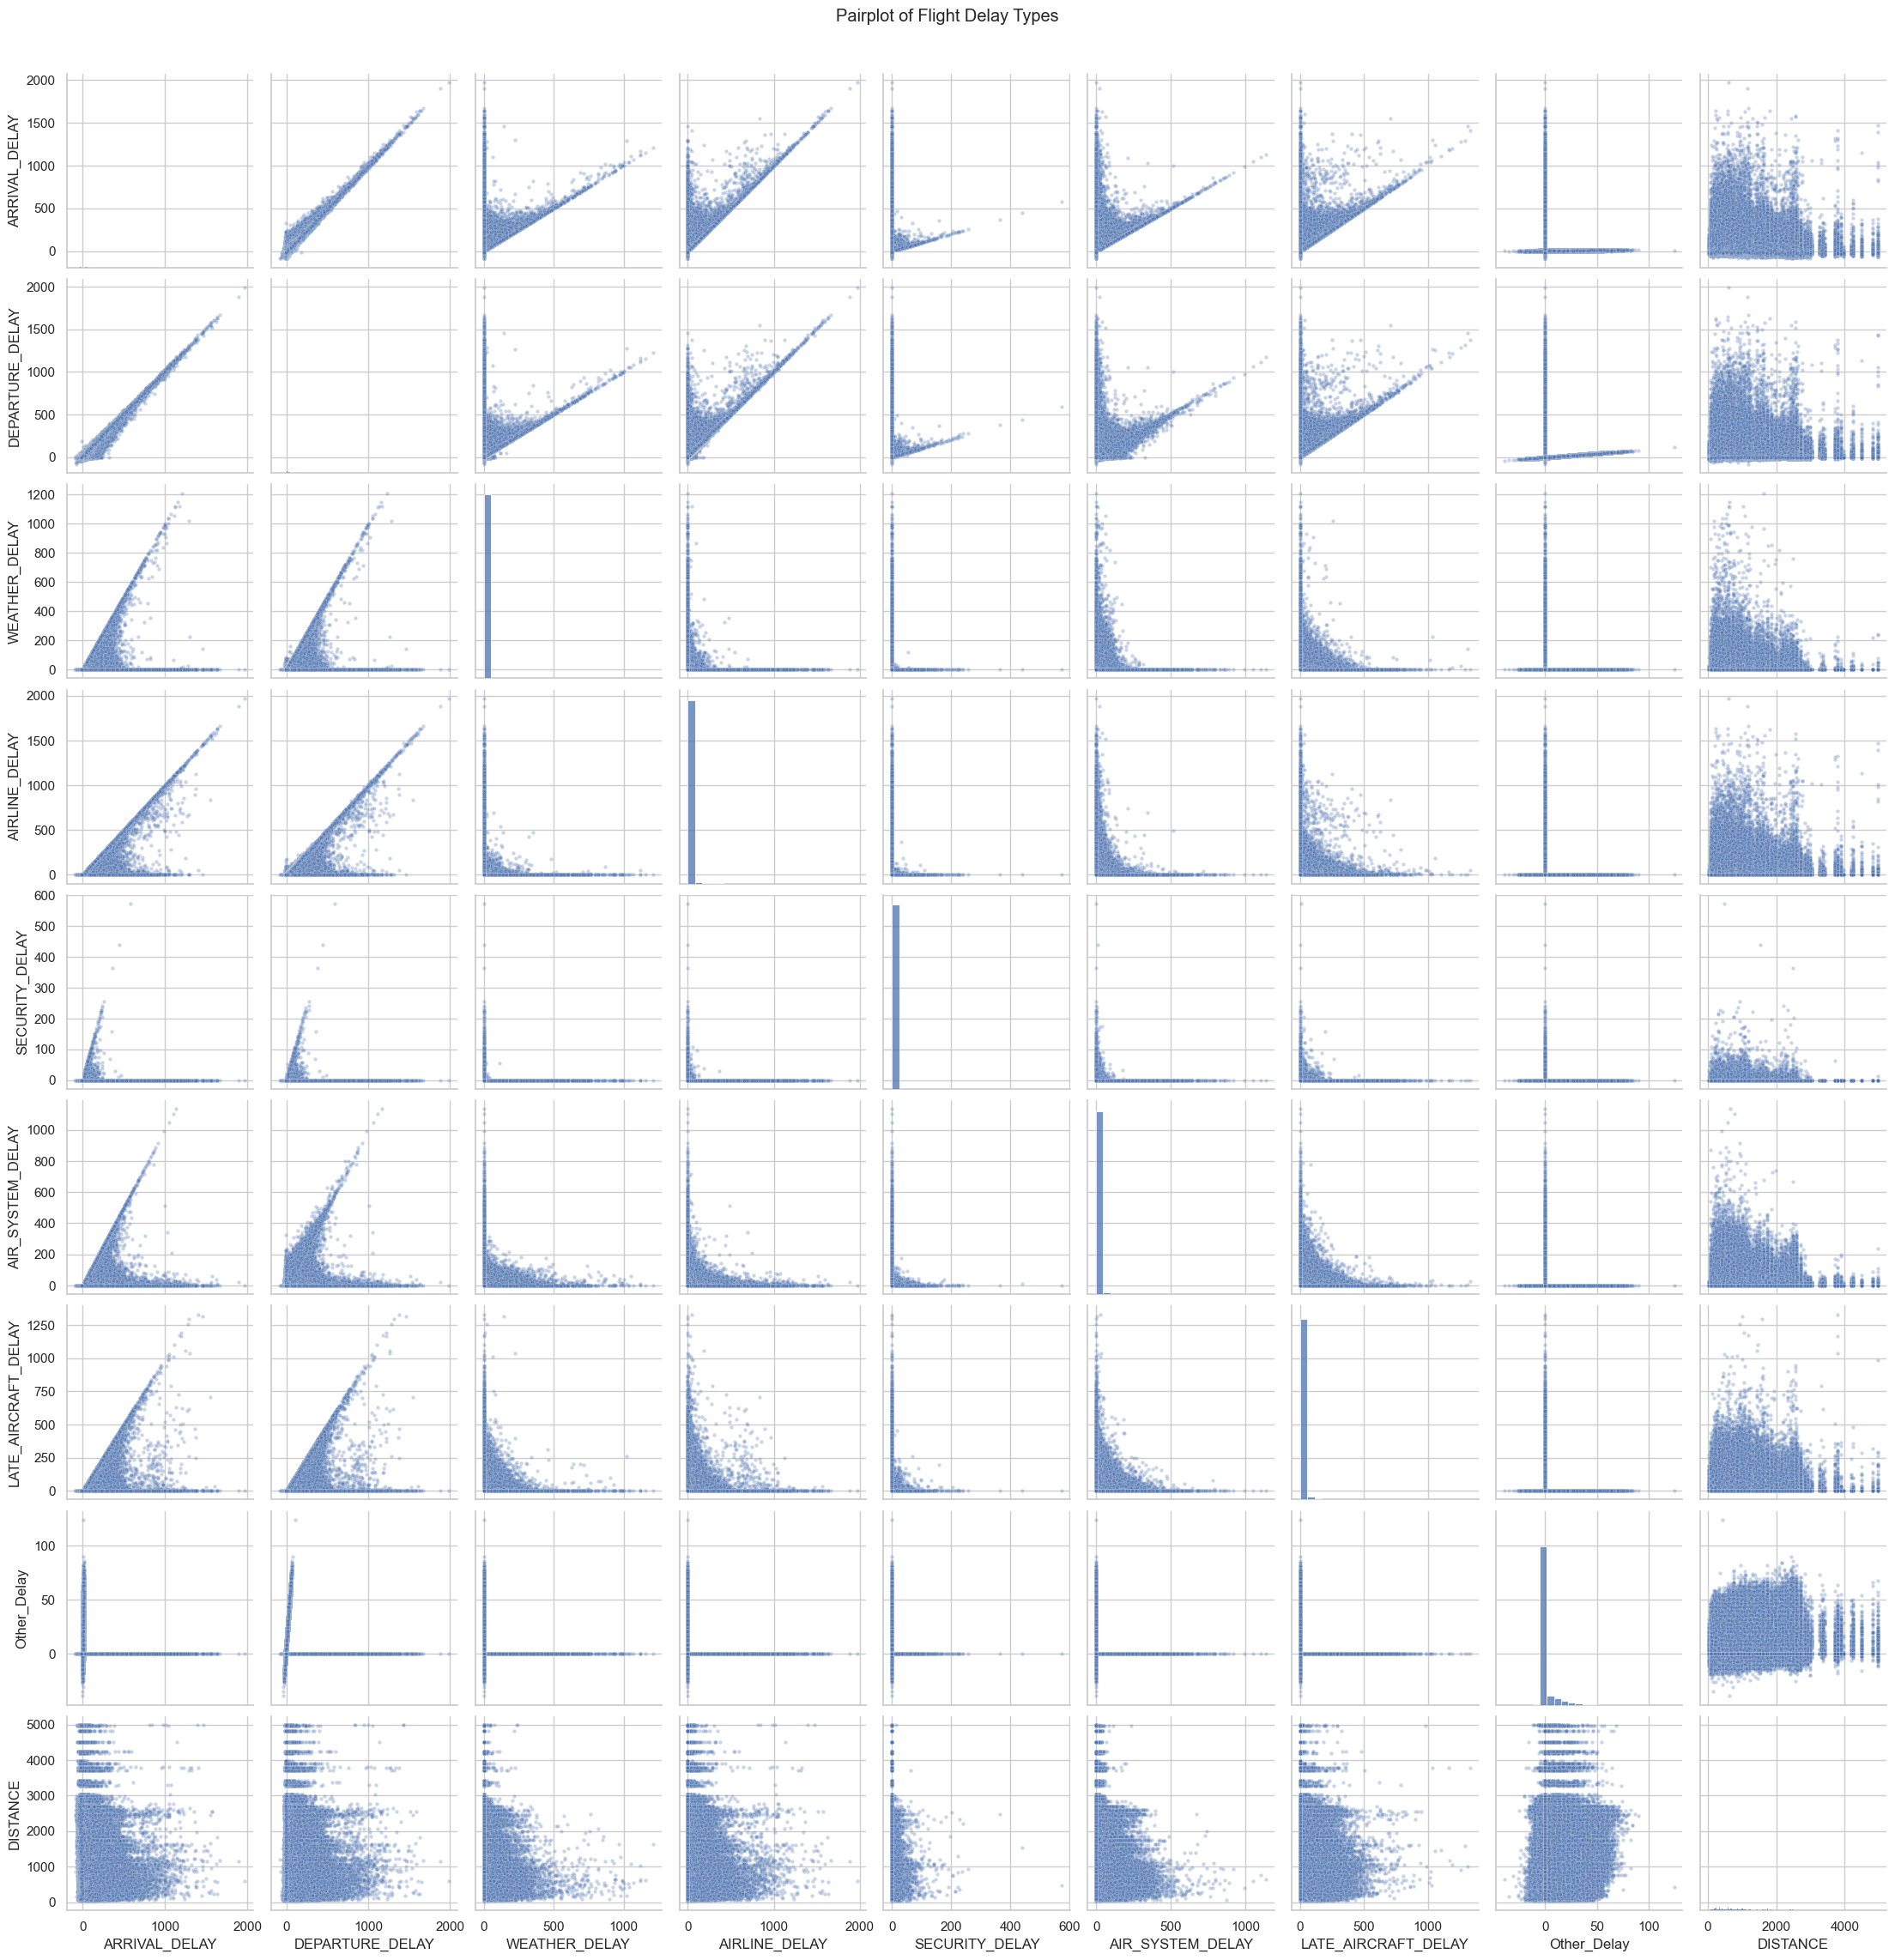

In [256]:

# Select only the relevant delay columns
delay_columns = ['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'AIR_SYSTEM_DELAY', 'LATE_AIRCRAFT_DELAY', 'Other_Delay', 'DISTANCE']
# Create a new DataFrame for plotting
df_plot = df[delay_columns].copy()
# Generate the pairplot
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_plot, plot_kws={'s': 10, 'alpha': 0.3})

plt.suptitle("Pairplot of Flight Delay Types", y=1.02)
plt.show()


In [257]:
# Common Reasons for Flight Cancellation
# Group by cancellation reason and count the number of cancellations
cancellation_reasons = df[df['CANCELLED'] == 1].groupby('CANCELLATION_REASON')['CANCELLED'].count().reset_index()
cancellation_reasons.columns = ['CANCELLATION_REASON', 'CANCELLED_COUNT']
cancellation_reasons = cancellation_reasons.sort_values(by='CANCELLED_COUNT', ascending=False)
cancellation_reasons

,CANCELLATION_REASON,CANCELLED_COUNT
1,B,48851
0,A,25262
2,C,15749
3,D,22


In [258]:
# map Cancellation Reason to their description
cancellation_reason_map = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

In [266]:
cancellation_reasons
# add description column
cancellation_reasons['Reason Name'] = cancellation_reasons['CANCELLATION_REASON'].map(cancellation_reason_map)

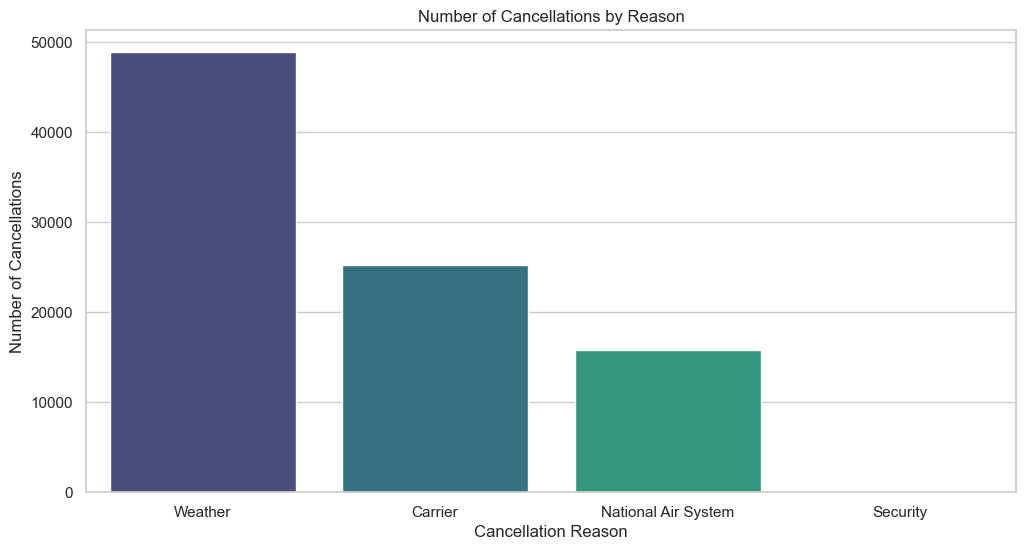

In [267]:
# Plotting the number of cancellations by reason
plt.figure(figsize=(12, 6))
sns.barplot(x='Reason Name', y='CANCELLED_COUNT', data=cancellation_reasons, palette='viridis')
plt.title('Number of Cancellations by Reason')
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Cancellations')
plt.show()

In [268]:
pd.set_option('display.max_columns', None)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Other_Delay,FLIGHT_STATUS
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Early
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Early
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,Delayed
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Early
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Early


In [269]:
df['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
Weather                48851
Carrier                25262
National Air System    15749
Security                  22
Name: count, dtype: int64

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Preprocessing
# Encode categorical variables
label_encoders = {}
categorical_columns = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'FLIGHT_STATUS']
for col in categorical_columns:
    le = LabelEncoder()
    # Convert all values in the column to strings
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
features = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 
            'SCHEDULED_DEPARTURE', 'DISTANCE', 'TAXI_OUT', 'TAXI_IN', 'AIR_SYSTEM_DELAY', 
            'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Other_Delay']
target = 'FLIGHT_STATUS'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

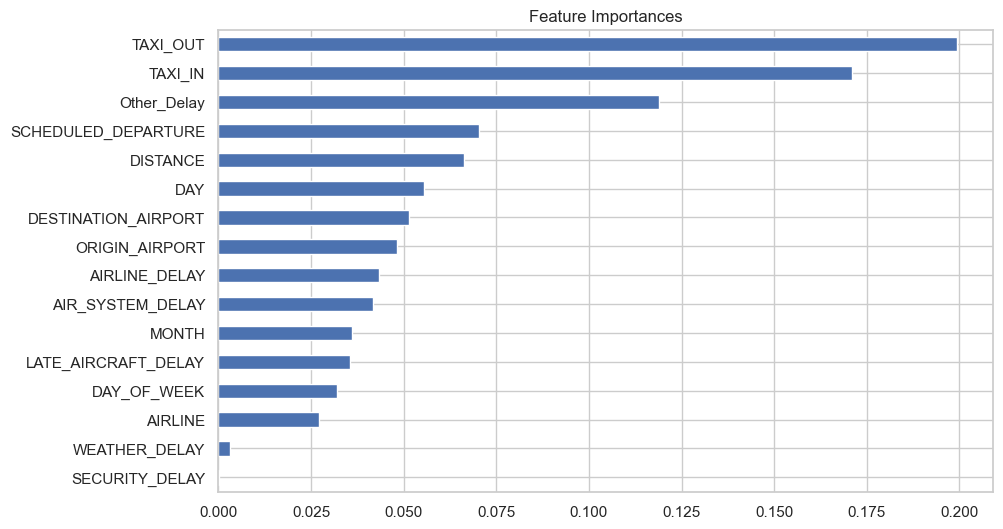

In [283]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importances')
plt.show()


In [281]:
# Make predictions
y_pred = model.predict(X_test)


In [282]:

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9688172357142366

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     17919
           1       1.00      0.98      0.99    417523
           2       0.84      0.19      0.31      3026
           3       0.95      1.00      0.97    699902
           4       0.22      0.00      0.00     25446

    accuracy                           0.97   1163816
   macro avg       0.80      0.63      0.65   1163816
weighted avg       0.95      0.97      0.96   1163816


Confusion Matrix:
 [[ 17812      0    107      0      0]
 [     0 409253      0   8267      3]
 [    27      1    570   2428      0]
 [     0      1      4 699886     11]
 [     0      6      0  25436      4]]


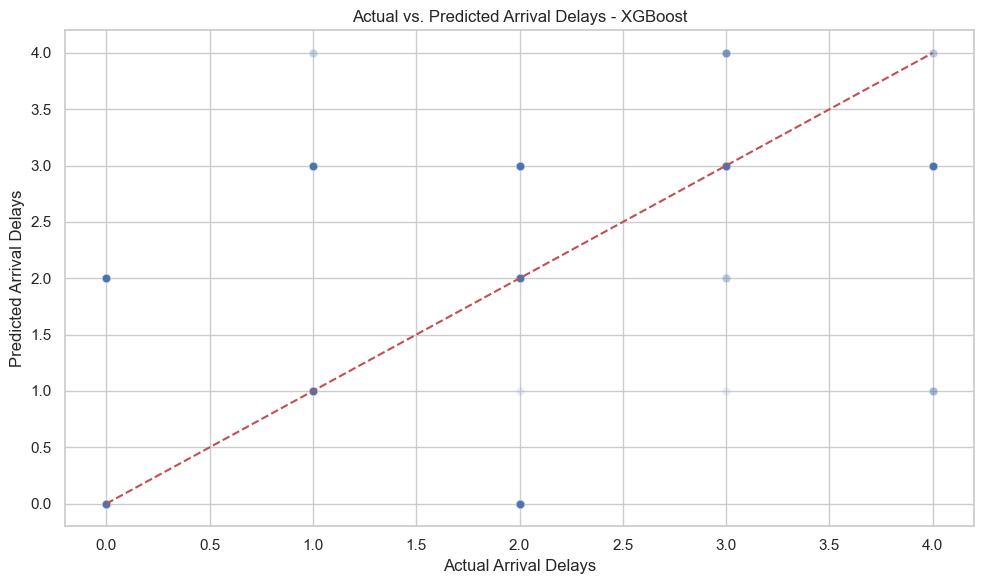

In [284]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.1)

# Add red diagonal line (perfect predictions)
max_val = max(max(y_test), max(y_pred))
plt.plot([0, max_val], [0, max_val], 'r--')

plt.xlabel('Actual Arrival Delays')
plt.ylabel('Predicted Arrival Delays')
plt.title('Actual vs. Predicted Arrival Delays - XGBoost')
plt.grid(True)
plt.tight_layout()
plt.show()


In [276]:
df['FLIGHT_STATUS'].value_counts(normalize=True)


FLIGHT_STATUS
3    0.601624
1    0.358630
4    0.021690
0    0.015446
2    0.002610
Name: proportion, dtype: float64

In [277]:
le = LabelEncoder()
df['FLIGHT_STATUS'] = le.fit_transform(df['FLIGHT_STATUS'])


In [278]:
label_encoders['FLIGHT_STATUS'].classes_


array(['Canceled', 'Delayed', 'Diverted', 'Early', 'On-Time'],
      dtype=object)

In [279]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    class_weight='balanced'  # Automatically adjusts weights
)


In [297]:
# Save original label classes (after fitting)
label_encoder = LabelEncoder()
label_encoder.fit(['Canceled', 'Delayed', 'Diverted', 'Early', 'On-Time'])
label_encoders['FLIGHT_STATUS'] = label_encoder


In [303]:
entry = {
    'MONTH': 5,
    'DAY': 12,
    'DAY_OF_WEEK': 4,
    'AIRLINE': 'AA',
    'ORIGIN_AIRPORT': 'JFK',
    'DESTINATION_AIRPORT': 'LAX',
    'SCHEDULED_DEPARTURE': 1530,
    'DISTANCE': 2475,
    'TAXI_OUT': 0,
    'TAXI_IN': 0,
    'AIR_SYSTEM_DELAY': 0,
    'SECURITY_DELAY': 0,
    'AIRLINE_DELAY': 5,
    'LATE_AIRCRAFT_DELAY': 0,
    'WEATHER_DELAY': 0,
    'Other_Delay': 4324
}
import pandas as pd

# Convert to DataFrame
entry_df = pd.DataFrame([entry])

# Apply label encoders (assuming you've stored them in a dictionary)
for col in ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']:
    le = label_encoders[col]
    # Ensure the encoder is fitted with all possible values, including the new ones
    le_classes = set(le.classes_)
    entry_classes = set(entry_df[col].unique())
    unseen_classes = entry_classes - le_classes
    if unseen_classes:
        le.classes_ = np.array(list(le_classes | unseen_classes))
    entry_df[col] = le.transform(entry_df[col])


In [304]:
# Reorder columns to match training
entry_df = entry_df[features]

# Predict
predicted_class = model.predict(entry_df)[0]

# Get class label
class_labels = label_encoders['FLIGHT_STATUS'].inverse_transform([predicted_class])[0]
# Map the predicted class to its corresponding class name
class_name = label_encoders['FLIGHT_STATUS'].inverse_transform([predicted_class])[0]
print("Predicted Flight Status:", class_name)


Predicted Flight Status: Canceled
